In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
df = pd.read_csv('Data_input_3.csv', parse_dates=['Date'], index_col='Date')
print(df.shape)
df.head()

(1258, 4)


,Close/Last,COMP,NATS,MSCI
Date,,,,
2024-05-30,10205.24,16737.08,1633.19,4983.64
2024-05-29,10396.40,16920.58,1733.33,5014.18
2024-05-28,10526.85,17019.88,1739.75,5051.64
2024-05-24,10549.22,16920.79,1751.27,5051.83
2024-05-23,10495.82,16736.03,1770.08,5016.81


In [38]:
data = df.iloc[::-1]
data.rename(columns = {'Close/Last':'Close'}, inplace = True)
data.head()

,Close,COMP,NATS,MSCI
Date,,,,
2019-06-03,4170.02,7333.02,835.84,2615.02
2019-06-04,4320.98,7527.12,863.30,2671.61
2019-06-05,4329.21,7575.48,875.85,2693.60
2019-06-06,4375.45,7615.55,881.34,2709.88
2019-06-07,4435.80,7742.10,894.46,2738.40


In [39]:
data.isnull().sum()

Close    0
COMP     0
NATS     0
MSCI     0
dtype: int64

# Trực quan hóa dữ liệu

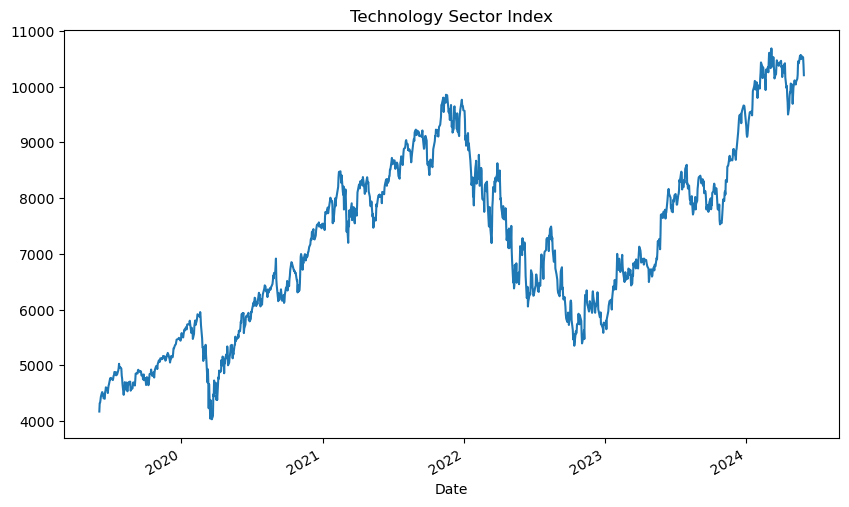

In [40]:
data['Close'].plot(figsize=(10, 6))
plt.title('Technology Sector Index')
plt.show()

In [41]:
# rolling_window = 30
# f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# sns.lineplot(x=data.index, y=data.Close, ax=ax[0, 0], color='indianred')
# sns.lineplot(x=data.index, y=data.Close.rolling(rolling_window).mean(), ax=ax[0, 0], color='green', label='rolling mean')
# sns.lineplot(x=data.index, y=data.Close.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
# ax[0, 0].set_title('Close', fontsize=14)
# ax[0, 0].set_ylabel(ylabel='Close', fontsize=14)

# sns.lineplot(x=data.index, y=data.COMP, ax=ax[0, 1], color='indianred')
# sns.lineplot(x=data.index, y=data.COMP.rolling(rolling_window).mean(), ax=ax[0, 1], color='green', label='rolling mean')
# sns.lineplot(x=data.index, y=data.COMP.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
# ax[0, 1].set_title('COMP', fontsize=14)
# ax[0, 1].set_ylabel(ylabel='COMP', fontsize=14)

# sns.lineplot(x=data.index, y=data.NATS, ax=ax[1, 0], color='indianred')
# sns.lineplot(x=data.index, y=data.NATS.rolling(rolling_window).mean(), ax=ax[1, 0], color='green', label='rolling mean')
# sns.lineplot(x=data.index, y=data.NATS.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
# ax[1, 0].set_title('NATS', fontsize=14)
# ax[1, 0].set_ylabel(ylabel='NATS', fontsize=14)

# sns.lineplot(x=data.index, y=data.MSCI, ax=ax[1, 1], color='indianred')
# sns.lineplot(x=data.index, y=data.MSCI.rolling(rolling_window).mean(), ax=ax[1, 1], color='green', label='rolling mean')
# sns.lineplot(x=data.index, y=data.MSCI.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
# ax[1, 1].set_title('MSCI', fontsize=14)
# ax[1, 1].set_ylabel(ylabel='MSCI', fontsize=14)

Trend/Season Decompose

In [42]:
# fig_2, ax_2 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 8))

# ax_2[0,0].set_title('Decomposition of Close', fontsize=16)
# res = seasonal_decompose(data['Close'], period = 365, model='additive', extrapolate_trend='freq')

# res.observed.plot(ax=ax_2[0,0], legend=False, color='dodgerblue')
# ax_2[0,0].set_ylabel('Observed', fontsize=14)
# # ax_2[0,0].set_ylim([-5, 35])

# res.trend.plot(ax=ax_2[1,0], legend=False, color='dodgerblue')
# ax_2[1,0].set_ylabel('Trend', fontsize=14)
# # ax_2[1,0].set_ylim([-5, 35])

# res.seasonal.plot(ax=ax_2[2,0], legend=False, color='dodgerblue')
# ax_2[2,0].set_ylabel('Seasonal', fontsize=14)
# # ax_2[2,0].set_ylim([-15, 15])

# res.resid.plot(ax=ax_2[3,0], legend=False, color='dodgerblue')
# ax_2[3,0].set_ylabel('Residual', fontsize=14)
# # ax_2[3,0].set_ylim([-15, 15])

# ax_2[0, 1].set_title('Decomposition of COMP', fontsize=16)
# res_comp = seasonal_decompose(data['COMP'], period = 365, model='additive', extrapolate_trend='freq')

# res_comp.observed.plot(ax=ax_2[0, 1], legend=False, color='dodgerblue')
# ax_2[0, 1].set_ylabel('Observed', fontsize=14)

# res_comp.trend.plot(ax=ax_2[1, 1], legend=False, color='dodgerblue')
# ax_2[1, 1].set_ylabel('Trend', fontsize=14)

# res_comp.seasonal.plot(ax=ax_2[2, 1], legend=False, color='dodgerblue')
# ax_2[2, 1].set_ylabel('Seasonal', fontsize=14)

# res_comp.resid.plot(ax=ax_2[3, 1], legend=False, color='dodgerblue')
# ax_2[3, 1].set_ylabel('Residual', fontsize=14)

# plt.show()

In [43]:
# fig_2, ax_2 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 8))

# ax_2[0,0].set_title('Decomposition of NATS', fontsize=16)
# res = seasonal_decompose(data['NATS'], period = 365, model='additive', extrapolate_trend='freq')

# res.observed.plot(ax=ax_2[0,0], legend=False, color='dodgerblue')
# ax_2[0,0].set_ylabel('Observed', fontsize=14)


# res.trend.plot(ax=ax_2[1,0], legend=False, color='dodgerblue')
# ax_2[1,0].set_ylabel('Trend', fontsize=14)


# res.seasonal.plot(ax=ax_2[2,0], legend=False, color='dodgerblue')
# ax_2[2,0].set_ylabel('Seasonal', fontsize=14)


# res.resid.plot(ax=ax_2[3,0], legend=False, color='dodgerblue')
# ax_2[3,0].set_ylabel('Residual', fontsize=14)


# ax_2[0, 1].set_title('Decomposition of MSCI', fontsize=16)
# res_comp = seasonal_decompose(data['MSCI'], period = 365, model='additive', extrapolate_trend='freq')

# res_comp.observed.plot(ax=ax_2[0, 1], legend=False, color='dodgerblue')
# ax_2[0, 1].set_ylabel('Observed', fontsize=14)

# res_comp.trend.plot(ax=ax_2[1, 1], legend=False, color='dodgerblue')
# ax_2[1, 1].set_ylabel('Trend', fontsize=14)

# res_comp.seasonal.plot(ax=ax_2[2, 1], legend=False, color='dodgerblue')
# ax_2[2, 1].set_ylabel('Seasonal', fontsize=14)

# res_comp.resid.plot(ax=ax_2[3, 1], legend=False, color='dodgerblue')
# ax_2[3, 1].set_ylabel('Residual', fontsize=14)

# plt.show()

# Kiểm định nhân quả

In [44]:
from statsmodels.tsa.stattools import grangercausalitytests

In [45]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns)

d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\sta

,Close_x,COMP_x,NATS_x,MSCI_x
Close_y,1.0000,0.0247,0.0264,0.0176
COMP_y,0.2764,1.0000,0.0305,0.0007
NATS_y,0.0505,0.0094,1.0000,0.0006
MSCI_y,0.0073,0.0059,0.0088,1.0000


# Train test split

In [46]:
n_test = 22
train_data, test_data = data[:-n_test], data[-n_test:]
print(train_data.shape)
print(test_data.shape)

(1236, 4)
(22, 4)


# Kiểm định tính dừng với ADF test và sai phân

In [47]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    # print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    # print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    # print(f' Significance Level    = {signif}')
    # print(f' Test Statistic        = {output["test_statistic"]}')
    # print(f' No. Lags Chosen       = {output["n_lags"]}')

    # for key,val in r[4].items():
    #     print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [48]:
for name, column in train_data.items():
    adfuller_test(column, name=column.name)
    print('\n')

 => P-Value = 0.6388. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 => P-Value = 0.5818. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 => P-Value = 0.5297. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 => P-Value = 0.6867. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




Sai phân dữ liệu

In [49]:
train_data_be_diff = pd.DataFrame()
train_data_be_diff['Close'] = train_data['Close']
train_data_be_diff['COMP'] = train_data['COMP']
train_data_be_diff['NATS'] = np.log(train_data['NATS']) 
train_data_be_diff['MSCI'] = train_data['MSCI']
train_data_diff = train_data_be_diff.diff()
train_data_diff = train_data_diff.dropna()
train_data_diff.head()

,Close,COMP,NATS,MSCI
Date,,,,
2019-06-04,150.96,194.10,0.032325,56.59
2019-06-05,8.23,48.36,0.014433,21.99
2019-06-06,46.24,40.07,0.006249,16.28
2019-06-07,60.35,126.55,0.014777,28.52
2019-06-10,80.08,81.07,0.008749,13.71


In [50]:
for name, column in train_data_diff.items():
    adfuller_test(column, name=column.name)
    print('\n')

 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [51]:
grangers_causation_matrix(train_data_diff, variables = data.columns)

d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\sta

,Close_x,COMP_x,NATS_x,MSCI_x
Close_y,1.0000,0.0208,0.0101,0.0047
COMP_y,0.1546,1.0000,0.0752,0.0007
NATS_y,0.1879,0.1700,1.0000,0.0021
MSCI_y,0.0052,0.0092,0.4805,1.0000


# Dự báo tuyến tính lùi (Sử dụng trong trường hợp các chuỗi dừng với sai phân khác nhau)

In [52]:
def cal_gamma_0(n, array):
  gamma_0 = 0
  for i in range(n):
    temp = array[i] * array[i]
    gamma_0 += temp
  gamma_0 = gamma_0 / n
  return gamma_0
def cal_gamma_1(n, array):
  gamma_1 = 0
  for i in range(n - 1):
    temp = array[i] * array[i + 1]
    gamma_1 += temp
  gamma_1 = gamma_1 / n
  return gamma_1
def cal_gamma_2(n, array):
  gamma_2 = 0
  for i in range(n - 2):
    temp = array[i] + array[i + 2]
    gamma_2 += temp
  gamma_2 = gamma_2 / n
  return gamma_2
def cal_gamma_3(n, array):
  gamma_3 = 0
  for i in range(n - 3):
    temp = array[i] + array[i + 3]
    gamma_3 += temp
  gamma_3 = gamma_3 / n
  return gamma_3
def theta_3steps(gamma_0, gamma_1, gamma_2, gamma_3):
  Theta = np.zeros((3,1))
  Gamma = np.zeros((3,3))
  gamma = np.zeros((3,1))
  Gamma[0,0] = gamma_0
  Gamma[0,1] = gamma_1
  Gamma[0,2] = gamma_2
  Gamma[1,0] = gamma_1
  Gamma[1,1] = gamma_0
  Gamma[1,2] = gamma_1
  Gamma[2,0] = gamma_2
  Gamma[2,1] = gamma_1
  Gamma[2,2] = gamma_0
  gamma[0,0] = gamma_1
  gamma[1,0] = gamma_2
  gamma[2,0] = gamma_3
  Theta = np.dot(np.linalg.inv(Gamma), gamma)
  return Theta
def predict_prev(array):
  mean = np.mean(array)
  n = len(array)
  array = array - mean
  gamma_0 = cal_gamma_0(n, array)
  gamma_1 = cal_gamma_1(n, array)
  gamma_2 = cal_gamma_2(n, array)
  gamma_3 = cal_gamma_3(n, array)
  Theta = theta_3steps(gamma_0, gamma_1 , gamma_2, gamma_3)
  predict = Theta[0,0] * array[0] + Theta[1,0] * array[1] + Theta[2,0] * array[2] + mean
  return predict

In [53]:
# columns = [] #Tên chuỗi cần bù giá trị
# predicted_data = {}
# for column in columns:
#   array_column = train_data_diff[column].to_numpy()
#   predicted_data[column] = predict_prev(array_column)
# previous_row = pd.DataFrame([predicted_data])
# train_data_diff = pd.concat([previous_row, train_data_diff], ignore_index=True)
# train_data_diff.head()

# Huấn luyện mô hình

In [54]:
model = VAR(train_data_diff)
x = model.select_order(maxlags=12)
x.summary()

d:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,13.36,13.38*,6.362e+05,13.37*
1,13.34*,13.43,6.226e+05*,13.37
2,13.35,13.50,6.255e+05,13.40
3,13.36,13.57,6.321e+05,13.44
4,13.36,13.64,6.323e+05,13.46
5,13.37,13.72,6.412e+05,13.50
6,13.38,13.80,6.456e+05,13.54
7,13.36,13.84,6.331e+05,13.54
8,13.37,13.92,6.383e+05,13.57
9,13.36,13.98,6.326e+05,13.59


In [55]:
model_train = model.fit(1)
model_train.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jun, 2024
Time:                     21:49:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    13.4044
Nobs:                     1234.00    HQIC:                   13.3526
Log likelihood:          -15203.2    FPE:                    610139.
AIC:                      13.3214    Det(Omega_mle):         600350.
--------------------------------------------------------------------
Results for equation Close
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            5.246200         3.818095            1.374           0.169
L1.Close         0.018651         0.097360            0.192           0.848
L1.COMP          0.060732         0.106334            0.571           0.568
L1.N

# Kiểm tra tương quan phần dư

Sử dụng kiểm định Durbin Watson
Nếu có tương quan (giá trị gần 0 hoặc 4) cần tăng bậc mô hình hoặc đổi mô hình.
Nếu gần 2 thì không có tương quan

In [56]:
from statsmodels.stats.stattools import durbin_watson

In [57]:
def adjust(val, length= 6): return str(val).ljust(length)
residual = durbin_watson(model_train.resid)

for col, val in zip(data.columns, residual):
    print(adjust(col), ':', round(val, 2))

Close  : 1.99
COMP   : 1.99
NATS   : 1.98
MSCI   : 1.99


# Dự báo

In [58]:
lag_order = model_train.k_ar
forecast_input = train_data_diff.values[-lag_order:]
forecast_input

array([[-1.59900000e+01,  5.51800000e+01, -2.07107656e-03,
         1.61100000e+01]])

Dự báo đa bước

In [59]:
# fc = model_train.forecast(y=forecast_input, steps=len(test_data))
# forecast_data = pd.DataFrame(fc, index=data.index[-len(test_data):], columns=data.columns)
# forecast_data.head()

Dự báo một bước

In [60]:
# test_data_pre = data[-n_test-1:]
# test_data_be_diff = pd.DataFrame()
# test_data_be_diff['Close'] = test_data_pre['Close']
# test_data_be_diff['COMP'] = test_data_pre['COMP']
# test_data_be_diff['NATS'] = np.log(test_data_pre['NATS']) 
# test_data_be_diff['MSCI'] = test_data_pre['MSCI']
# test_data_diff = test_data_be_diff.diff()
# test_data_diff = test_data_diff.dropna()

In [61]:
# fc_multi = np.empty((22,4))
# forecast_multi = forecast_input
# for i in range(len(test_data)):
#     fc_multi_i = model_train.forecast(y=forecast_multi, steps=1)
#     fc_multi[i] = fc_multi_i
#     forecast_multi = forecast_multi[1:,:]
#     new_row = test_data_diff.iloc[i].to_numpy().reshape(1, -1)
#     forecast_multi = np.vstack((forecast_multi, new_row))
# forecast_data = pd.DataFrame(fc_multi, index=data.index[-len(test_data):], columns=data.columns)
# forecast_data.head()


Chuyển ngược về ban đầu

In [62]:
forecast_data_all = pd.concat([train_data_diff, forecast_data], ignore_index=True)
new_row = pd.DataFrame([[0, 0, 0, 0]], columns=data.columns)
forecast_data_all = pd.concat([new_row, forecast_data_all], ignore_index=True)
forecast_data_all.head()

,Close,COMP,NATS,MSCI
0,0.00,0.00,0.000000,0.00
1,150.96,194.10,0.032325,56.59
2,8.23,48.36,0.014433,21.99
3,46.24,40.07,0.006249,16.28
4,60.35,126.55,0.014777,28.52


In [63]:
forecast_data_all_return = pd.DataFrame()
forecast_data_all_return = forecast_data_all.cumsum() + train_data_be_diff.iloc[0]
forecast_data_all_return['NATS'] = np.exp(forecast_data_all_return['NATS'])
forecast_data_all_return.set_index(data.index, inplace=True)
forecast_data_all_return.head()

,Close,COMP,NATS,MSCI
Date,,,,
2019-06-03,4170.02,7333.02,835.84,2615.02
2019-06-04,4320.98,7527.12,863.30,2671.61
2019-06-05,4329.21,7575.48,875.85,2693.60
2019-06-06,4375.45,7615.55,881.34,2709.88
2019-06-07,4435.80,7742.10,894.46,2738.40


In [64]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [65]:
mape_close = mean_absolute_percentage_error(test_data['Close'], forecast_data_all_return['Close'][-n_test:]) 
mape_close

0.024554748231631708

In [66]:
mse_close = mean_squared_error(test_data['Close'], forecast_data_all_return['Close'][-n_test:])
rmse_close = np.sqrt(mse_close)
rmse_close

308.93412270796586

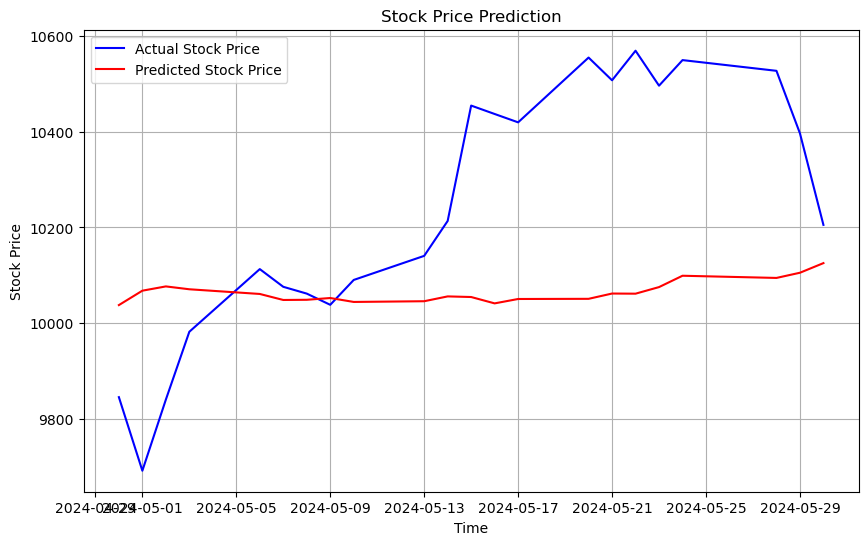

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Close'], color='blue', label='Actual Stock Price')
plt.plot(forecast_data_all_return['Close'][-n_test:], color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Lưu mô hình

In [68]:
# model_train.save('VAREconomic.pkl')

In [69]:
# np.save('forecast_economic.npy', forecast_input)